# Exploratory Data Analysis: Mobility and COVID-19

### The goal of this notebook is to explore the dataset we have produced during the data wrangling step which contains data on mobility and COVID-19 Infection Rate 

In [112]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

In the previous notebook we merged three datasets. One with mobilty data from apple, one with mobility date from google and another with COVID-19 infection data from the NY Times. We matched everything on the state level. 

Let's explore the dataset!

### Exploring the full dataset

In [113]:
# We will first load in the dataset containing data from apple, google and infections
full_df= pd.read_csv('Data/full_data_state_level.csv', index_col= 0)
full_df.head()

,state,date,retail_and_recreation,grocery_and_pharmacy,parks,transit,workplace,residential,driving gps hits,transit gps hits,walking gps hits,cases,deaths
0,Alabama,2020-03-13,7.0,32.0,26.0,7.0,-2.0,0.0,160.430000,110.95,110.84,6,0
1,Alabama,2020-03-14,1.0,28.0,55.0,12.0,4.0,0.0,169.976429,116.64,114.48,12,0
2,Alabama,2020-03-15,-7.0,16.0,16.0,6.0,-4.0,2.0,119.303036,78.24,59.90,23,0
3,Alabama,2020-03-16,-2.0,24.0,22.0,2.0,-10.0,4.0,116.498750,91.18,77.73,29,0
4,Alabama,2020-03-17,-11.0,17.0,25.0,-1.0,-17.0,7.0,107.171250,84.92,72.97,39,0


In [114]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4261 entries, 0 to 4260
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  4261 non-null   object 
 1   date                   4261 non-null   object 
 2   retail_and_recreation  4261 non-null   float64
 3   grocery_and_pharmacy   4261 non-null   float64
 4   parks                  4252 non-null   float64
 5   transit                4261 non-null   float64
 6   workplace              4261 non-null   float64
 7   residential            4261 non-null   float64
 8   driving gps hits       4261 non-null   float64
 9   transit gps hits       2914 non-null   float64
 10  walking gps hits       3313 non-null   float64
 11  cases                  4261 non-null   int64  
 12  deaths                 4261 non-null   int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 466.0+ KB


Notes 

It looks like we have a lot of null vales in the transit and walking gps hits columns 



#### Question: How many states do we have in this dataset? 

In [115]:
full_df.state.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [116]:
print('We have {} states in this dataset.'.format(full_df.state.nunique()))

We have 50 states in this dataset.


#### Question: What dates are contained within this dataset? 

In [117]:
print('This earliest date is {} and the most recent date is {}.'.format(full_df.date.min(), full_df.date.max()))

This earliest date is 2020-02-15 and the most recent date is 2020-05-29.


#### Question: How have GPS hits changed over the time? 

Text(0, 0.5, 'Mobility')

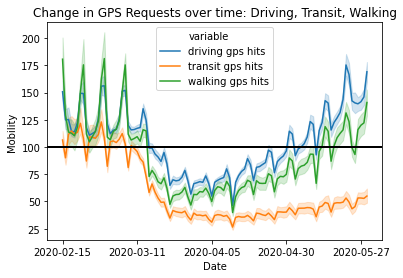

In [118]:
import matplotlib.ticker as ticker

# Pull out Driving, Transit, Walking and melt it down to a new df to make it easier to plot 
tl= full_df[['date', 'driving gps hits', 'transit gps hits', 'walking gps hits']]
tl= tl.melt(id_vars='date')
sns.lineplot(x='date',y='value',data=tl, hue='variable')

# set the axis to be number of days rather than the actual date
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=25))
# Put a line at baseline which is 100
ax.axhline(100, color='black', lw=2)

plt.title('Change in GPS Requests over time: Driving, Transit, Walking')
plt.xlabel('Date')
plt.ylabel('Mobility')

Notes

1) All GPS hits dipped in March and April 

2) Walking and Driving GPS hits started to rise again in the middle of April, suprapping the baseline towards the beggining of may 

3) Transit GPS hits have stayed depressed throughout our time series 

#### Question: How has movement to different categories of places changed over time? 

In [119]:
full_df.columns

Index(['state', 'date', 'retail_and_recreation', 'grocery_and_pharmacy',
       'parks', 'transit', 'workplace', 'residential', 'driving gps hits',
       'transit gps hits', 'walking gps hits', 'cases', 'deaths'],
      dtype='object')

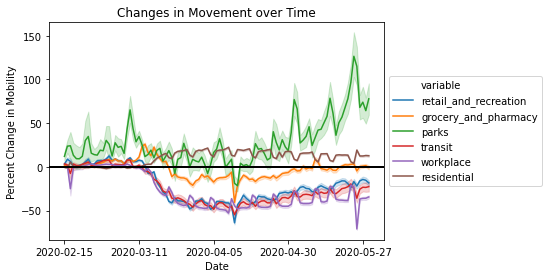

In [120]:
# Pull out Driving, Transit, Walking and melt it down to a new df to make it easier to plot 
mvmt= full_df[['date', 'retail_and_recreation', 'grocery_and_pharmacy', 'parks', 'transit', 'workplace', 'residential']]
mvmt= mvmt.melt(id_vars='date')
sns.lineplot(x='date',y='value',data=mvmt, hue='variable', legend='brief')

# Set the axis to be number of days rather than the date
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=25))
# Put a line at 0
ax.axhline(0, color='black', lw=2)

plt.title('Changes in Movement over Time')
plt.xlabel('Date')
plt.ylabel('Percent Change in Mobility')
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))

Notes

1) Transit station visits, workplace visits, retail/recreation visits and grocery visits have all decreased the most over time. 

2) Residential visits have risen over time 

3) Grocery/Pharamacy visits saw a slight decrease from March through April and then have rise slowly

4) Parks visits took a slight dip but have seen a large rise since the end of April



#### Question: Which city in our dataset has the most cases? 

In [121]:
# What county has the most cases? 
full_df[full_df['cases'] == full_df.cases.max()]

,state,date,retail_and_recreation,grocery_and_pharmacy,parks,transit,workplace,residential,driving gps hits,transit gps hits,walking gps hits,cases,deaths
2710,New York,2020-05-29,-47.0,-11.0,3.0,-57.0,-49.0,22.0,134.141364,48.82,107.702,373108,29535


#### Question: How has the distribution of cases changed over time? 

/Users/jeremysilva/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Density')

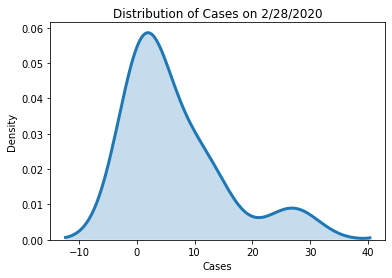

In [122]:
sns.distplot(full_df.dropna()[full_df['date'] == '2020-02-28']['cases'], hist=False, kde= True, kde_kws = {'shade': True, 'linewidth': 3}, bins=100)
plt.title('Distribution of Cases on 2/28/2020')
plt.xlabel('Cases')
plt.ylabel('Density')

/Users/jeremysilva/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Density')

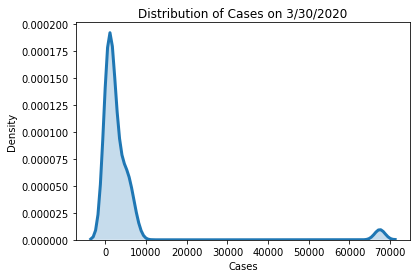

In [123]:
sns.distplot(full_df.dropna()[full_df['date'] == '2020-03-30']['cases'], hist=False, kde= True, kde_kws = {'shade': True, 'linewidth': 3}, bins=100)
plt.title('Distribution of Cases on 3/30/2020')
plt.xlabel('Cases')
plt.ylabel('Density')

/Users/jeremysilva/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Density')

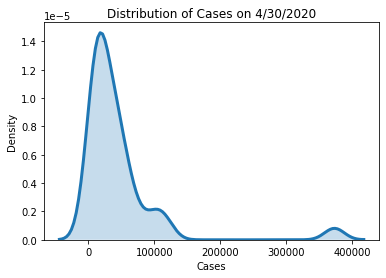

In [124]:
sns.distplot(full_df.dropna()[full_df['date'] == full_df.date.max()]['cases'], hist=False, kde= True, kde_kws = {'shade': True, 'linewidth': 3}, bins=100)
plt.title('Distribution of Cases on 4/30/2020')
plt.xlabel('Cases')
plt.ylabel('Density')

/Users/jeremysilva/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Density')

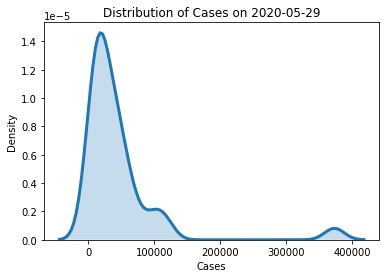

In [125]:
sns.distplot(full_df.dropna()[full_df['date'] == full_df.date.max()]['cases'], hist=False, kde= True, kde_kws = {'shade': True, 'linewidth': 3}, bins=100)
plt.title('Distribution of Cases on {}'.format(str(full_df.date.max())))
plt.xlabel('Cases')
plt.ylabel('Density')

Notes:

1) Cases were the most unevenly distributed at the end of March

2) Since March the cases have moved towards a slightly more even distribution altough if is still very uneven

3) Overall cases seem to be unevenly distributed across the country

4) At the end of May there were still some states with cases near 0 

#### Question: How many cases are there in the whole country as of the most recent date? How many cases were there in the whole country on the first day of our dataset? 
                

In [126]:
cases_day_one= full_df[full_df['date'] == full_df.date.min()]['cases'].sum()
cases_most_recent= full_df[full_df['date'] == full_df.date.max()]['cases'].sum()
print('There were {cases_day_one} cases in the US on {date_min}.'.format(cases_day_one= cases_day_one, date_min= full_df.date.min()))
print('There were {cases_most_recent} cases in the US on {date_max}.'.format(cases_most_recent= cases_most_recent, date_max= full_df.date.max()))

There were 15 cases in the US on 2020-02-15.
There were 1741318 cases in the US on 2020-05-29.


#### Question: How have cases grown over time? 

Text(0, 0.5, 'Number of Cases')

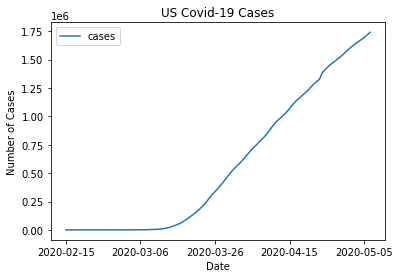

In [127]:
# Make a pivot table that holds the sum of all the cases for each date in the dataset
sum_cases= pd.pivot_table(data= full_df, index= 'date', values= ['cases'], aggfunc= sum)
# Make a lineplot 
sum_cases.plot(kind='line')

# Set the ticks on the x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=25))


plt.title('US Covid-19 Cases')
plt.xlabel('Date')
plt.ylabel('Number of Cases')



#### Question: What does the distribution look like for our various mobility markers? 

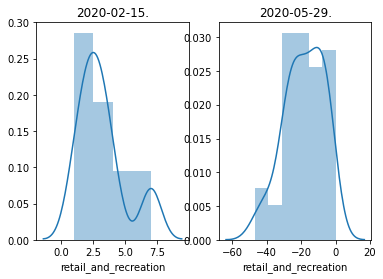

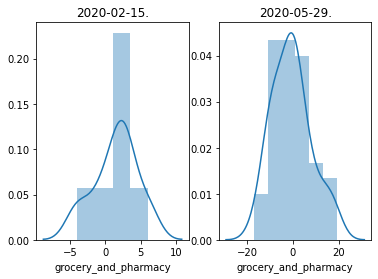

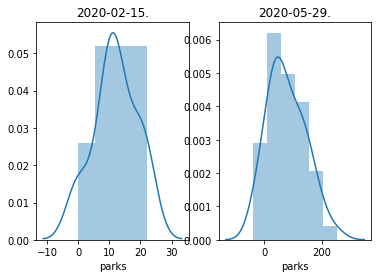

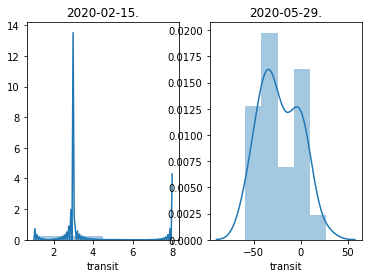

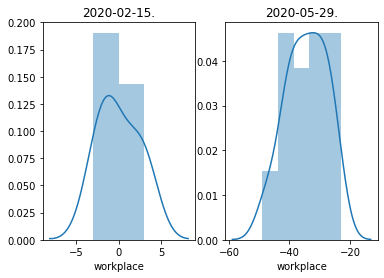

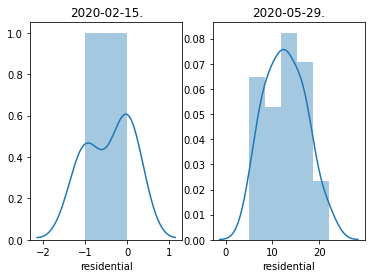

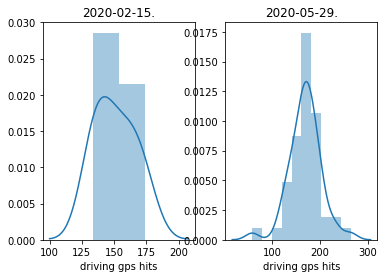

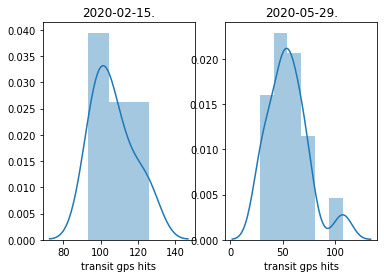

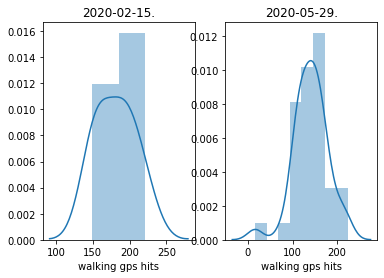

<Figure size 432x288 with 0 Axes>

In [139]:
# Create a list of the mobility markers for itteration
mobility_markers= list(full_df.iloc[:,2:-2].columns)
# Extract only the data from our first date and then slice it to contain only the mobility columns
day_one= full_df[full_df['date'] == full_df.date.min()].iloc[:, 2:-2]
# Extract only the data from our most recent date and then slice to contain only the mobility columns
most_recent= full_df[full_df['date'] == full_df.date.max()].iloc[:,2:-2]

for marker in mobility_markers: 
    plt.subplot(1, 2, 1)
    sns.distplot(day_one[marker].dropna())
    plt.title('{date_min}.'.format(date_min= str(full_df.date.min())))
    plt.subplot(1,2,2) 
    sns.distplot(most_recent[marker].dropna())
    plt.title('{date_max}.'.format(date_max= str(full_df.date.max())))
    plt.show()
    plt.tight_layout(pad=10, w_pad=10, h_pad=5)
 

#### Question: How do the variables relate to eachother?  

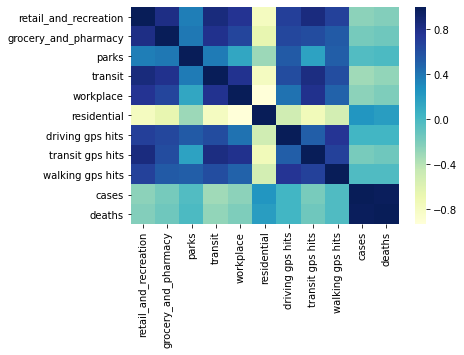

In [143]:
sns.heatmap(full_df.corr(), cmap="YlGnBu")


In [144]:
full_df.corr()

,retail_and_recreation,grocery_and_pharmacy,parks,transit,workplace,residential,driving gps hits,transit gps hits,walking gps hits,cases,deaths
retail_and_recreation,1.000000,0.814133,0.366363,0.855647,0.762500,-0.777308,0.697249,0.848801,0.681060,-0.251547,-0.216714
grocery_and_pharmacy,0.814133,1.000000,0.392911,0.782725,0.654039,-0.655016,0.650375,0.621991,0.539156,-0.174718,-0.144408
parks,0.366363,0.392911,1.000000,0.376507,0.138304,-0.298362,0.538724,0.167187,0.511303,-0.027861,-0.008829
transit,0.855647,0.782725,0.376507,1.000000,0.778445,-0.782208,0.621653,0.832360,0.610577,-0.317699,-0.270265
workplace,0.762500,0.654039,0.138304,0.778445,1.000000,-0.930914,0.421860,0.782392,0.498488,-0.245198,-0.201053
residential,-0.777308,-0.655016,-0.298362,-0.782208,-0.930914,1.000000,-0.504902,-0.737219,-0.517653,0.240362,0.198636
driving gps hits,0.697249,0.650375,0.538724,0.621653,0.421860,-0.504902,1.000000,0.509781,0.752095,0.030743,0.030971
transit gps hits,0.848801,0.621991,0.167187,0.832360,0.782392,-0.737219,0.509781,1.000000,0.682874,-0.180906,-0.145927
walking gps hits,0.681060,0.539156,0.511303,0.610577,0.498488,-0.517653,0.752095,0.682874,1.000000,-0.018812,-0.021868
cases,-0.251547,-0.174718,-0.027861,-0.317699,-0.245198,0.240362,0.030743,-0.180906,-0.018812,1.000000,0.980821


Notes

1) Cases does not appear to be highly correlated with any of the mobiity markers

2) There are some strong correlations between mobility markers

3) Cases and Deaths are highly correlated telling us that death rate doesn't seem to vary all that much between locations